In [18]:
!pip install transformers
!pip install torch

In [19]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

In [20]:
import csv
import pandas as pd

In [21]:
# Load the pre-trained BERT model.
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/bert-tiny-finetuned-enron-spam-detection")

In [22]:
# Load the BERT tokenizer.
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [23]:
# Define a function to classify an email.
def classify_email(email):
    """Classifies an email as spam or not spam.

    Args:
        email: A string containing the email to classify.

    Returns:
        A string indicating whether the email is spam or not spam.
    """

    tokens = tokenizer(email, return_tensors="pt")
    input_ids = tokens.get('input_ids')

    logits = model(input_ids)
    logits_tensor = logits.logits
    predictions = torch.argmax(logits_tensor, dim=-1)

    if predictions == 0:
        return "Spam"
    else:
        return "Ham"

In [24]:
# Read the CSV file containing the emails.
emails_df = pd.read_csv("SpamHamPreprocessedDataset.csv")

In [25]:
emails_df

,Subject,Label,Generatedbody
0,URGENT: Your bank account has been compromised!,Spam,URGENT: Your bank account has been compromised...
1,FREE Viagra for men!,Spam,FREE Viagra for men!\nSent on the run\nOn Mar ...
2,You've won the lottery!,Spam,You've won the lottery!\nSent from my iPhone\n...
3,Your credit card has been declined.,Spam,Your credit card has been declined.\nPlease up...
4,Your computer is infected with a virus!,Spam,Your computer is infected with a virus!\nSent ...
5,Lose weight fast and easy!,Spam,Lose weight fast and easy!\nSent from my iPhon...
6,Make money online quickly and easily!,Spam,Make money online quickly and easily!\nView th...
7,Get rich quick!,Spam,"Get rich quick!\nDear Jane,\nCongratulations o..."
8,Invest in our new cryptocurrency and earn big ...,Spam,Invest in our new cryptocurrency and earn big ...
9,Click here to claim your free gift!,Spam,Click here to claim your free gift!\nEmail not...


In [26]:
import torch
# Add a new column to the DataFrame to store the spam/ham classification.
emails_df["spam_or_ham"] = emails_df["Generatedbody"].apply(classify_email)

In [27]:
# Save the updated DataFrame to a new CSV file.
emails_df.to_csv("Email_Classification_mrm8488_bert-tiny-finetuned-enron-spam-detection.csv", index=False)

In [28]:
emails_df

,Subject,Label,Generatedbody,spam_or_ham
0,URGENT: Your bank account has been compromised!,Spam,URGENT: Your bank account has been compromised...,Ham
1,FREE Viagra for men!,Spam,FREE Viagra for men!\nSent on the run\nOn Mar ...,Spam
2,You've won the lottery!,Spam,You've won the lottery!\nSent from my iPhone\n...,Spam
3,Your credit card has been declined.,Spam,Your credit card has been declined.\nPlease up...,Ham
4,Your computer is infected with a virus!,Spam,Your computer is infected with a virus!\nSent ...,Ham
5,Lose weight fast and easy!,Spam,Lose weight fast and easy!\nSent from my iPhon...,Ham
6,Make money online quickly and easily!,Spam,Make money online quickly and easily!\nView th...,Ham
7,Get rich quick!,Spam,"Get rich quick!\nDear Jane,\nCongratulations o...",Ham
8,Invest in our new cryptocurrency and earn big ...,Spam,Invest in our new cryptocurrency and earn big ...,Ham
9,Click here to claim your free gift!,Spam,Click here to claim your free gift!\nEmail not...,Ham


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a confusion matrix
confusion = confusion_matrix(emails_df["Label"], emails_df["spam_or_ham"], labels=["Ham", "Spam"])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)



Confusion Matrix:
[[ 9  6]
 [14  2]]


In [37]:
# Create a classification report
report = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["Ham", "Spam"])

# Print the classification report
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

         Ham       0.39      0.60      0.47        15
        Spam       0.25      0.12      0.17        16

    accuracy                           0.35        31
   macro avg       0.32      0.36      0.32        31
weighted avg       0.32      0.35      0.32        31



In [32]:
pip install matplotlib seaborn

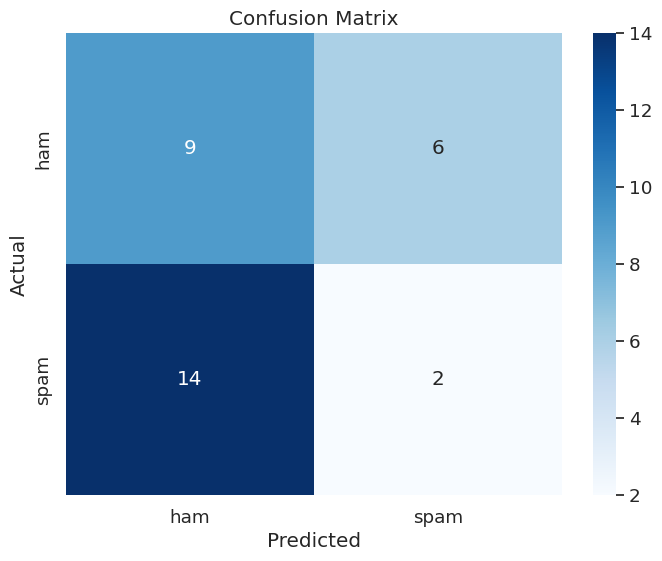

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for the matrix
labels = ["ham", "spam"]

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

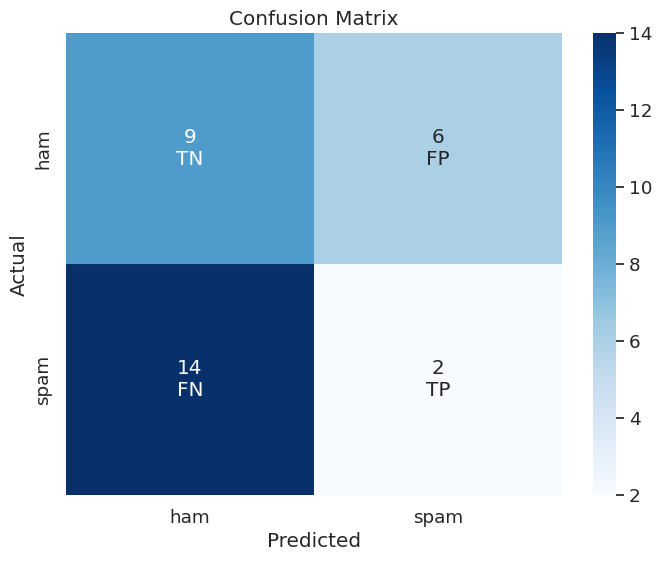

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for the matrix
labels = ["ham", "spam"]

# Create a seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a custom annotation array to label the cells with values and labels without hardcoding
annotations = []
for i in range(len(labels)):
    row = []
    for j in range(len(labels)):
        cell_label = f"{confusion[i, j]}\n"
        if i == 0:
            cell_label += "TN" if j == 0 else "FP"
        else:
            cell_label += "FN" if j == 0 else "TP"
        row.append(cell_label)
    annotations.append(row)

# Create the heatmap with custom annotations
sns.heatmap(confusion, annot=annotations, fmt="", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Customize the axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [35]:
!pip install tabulate


In [39]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Get the classification report as a dictionary
report_dict = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["ham", "spam"], output_dict=True)

# Create a nicely formatted table using tabulate
report_table = []
for label, metrics in report_dict.items():
    if label in ["ham", "spam"]:
        report_table.append([label, metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["support"]])

# Add a header row to the table
header = ["Class", "Precision", "Recall", "F1-Score", "Support"]
report_table.insert(0, header)

# Print the formatted classification report
print(tabulate(report_table, headers="firstrow", tablefmt="pretty"))


+-------+-------------------+--------+---------------------+---------+
| Class |     Precision     | Recall |      F1-Score       | Support |
+-------+-------------------+--------+---------------------+---------+
|  ham  | 0.391304347826087 |  0.6   | 0.47368421052631576 |   15    |
| spam  |       0.25        | 0.125  | 0.16666666666666666 |   16    |
+-------+-------------------+--------+---------------------+---------+


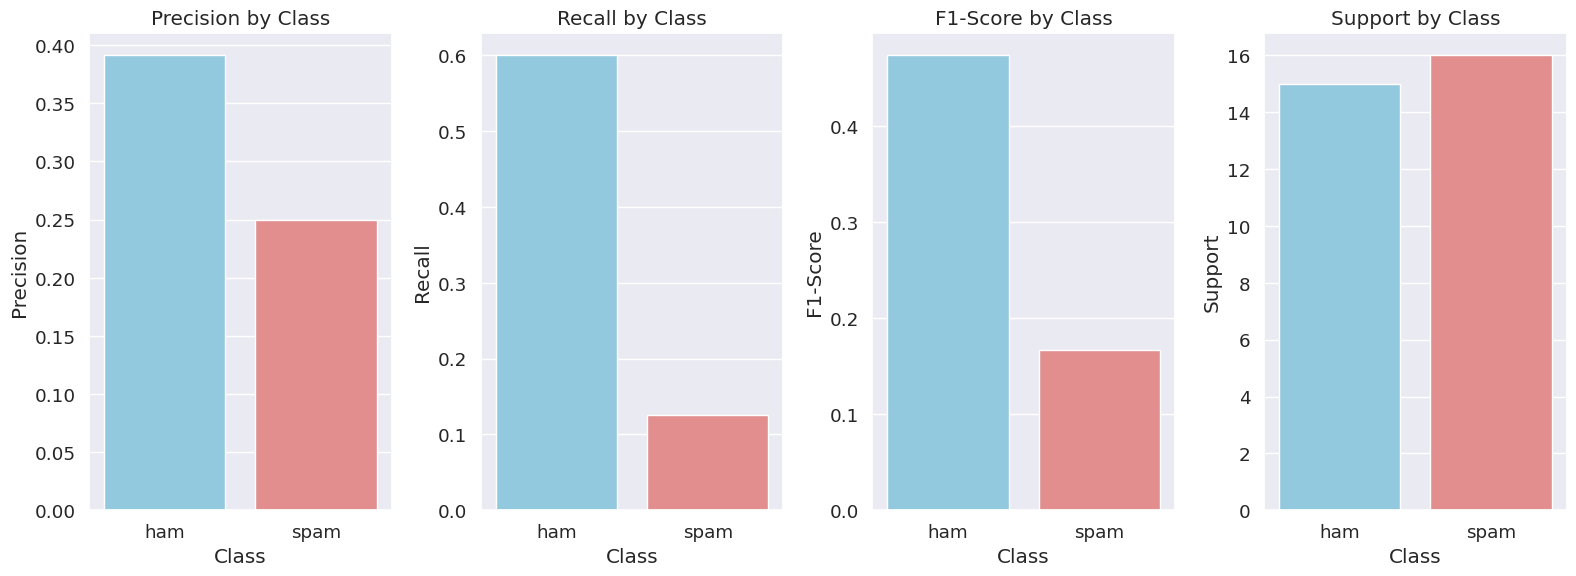

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(emails_df["Label"], emails_df["spam_or_ham"], target_names=["ham", "spam"], output_dict=True)

# Extract relevant metrics for each class
class_names = ["ham", "spam"]
metrics = {
    "Precision": [report_dict[class_name]["precision"] for class_name in class_names],
    "Recall": [report_dict[class_name]["recall"] for class_name in class_names],
    "F1-Score": [report_dict[class_name]["f1-score"] for class_name in class_names],
    "Support": [report_dict[class_name]["support"] for class_name in class_names],
}

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(16, 6))

# Customize the colors
colors = ["skyblue", "lightcoral"]

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    sns.barplot(x=class_names, y=values, ax=axes[i], palette=colors)
    axes[i].set_title(f"{metric_name} by Class")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(metric_name)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


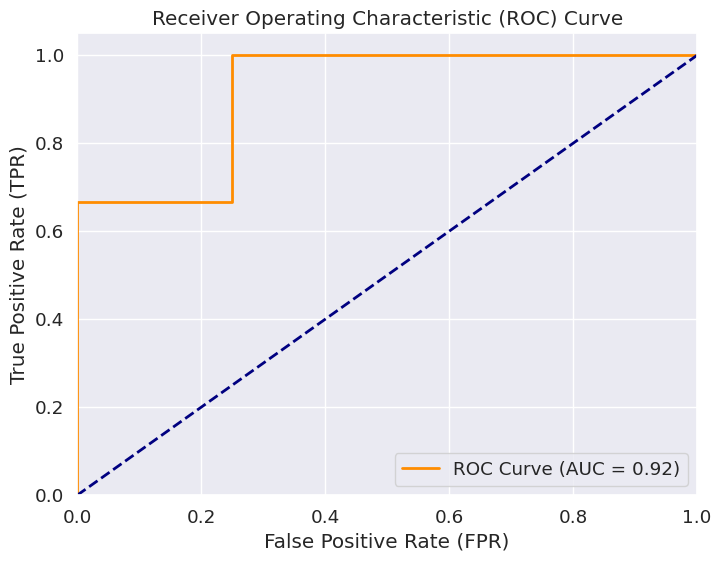

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import numpy as np
from transformers import AutoTokenizer

# Encode the labels
label_encoder = LabelEncoder()
emails_df["Label"] = label_encoder.fit_transform(emails_df["Label"])

# Split the data into training and test sets
X = emails_df["Generatedbody"]
y = emails_df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data and convert it to tensors
X_test_tokens = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=128)

# Assuming you have a binary classification model named "model"

# Get the model's raw logits
with torch.no_grad():
    logits = model(**X_test_tokens).logits

# Apply softmax to get probabilities
probs = torch.softmax(logits, dim=1)

# Get probabilities for the positive class (class 1)
y_pred_prob = probs[:, 1].cpu().numpy()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The code you provided generates an ROC (Receiver Operating Characteristic) curve and calculates the AUC (Area Under the ROC Curve) to evaluate the performance of a binary classification model. Here's how to interpret the results obtained from the code:

1. ROC Curve:
   - The ROC curve is a graphical representation of the model's performance across different decision thresholds.
   - It shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) as you vary the decision threshold.
   - The TPR (True Positive Rate) is also known as Recall or Sensitivity, and it represents the proportion of actual positive samples correctly classified as positive.
   - The FPR (False Positive Rate) represents the proportion of actual negative samples incorrectly classified as positive.
   - The ROC curve is plotted with TPR (sensitivity) on the y-axis and FPR (1-specificity) on the x-axis.
   - A diagonal line (dashed line) from the bottom-left to the top-right represents random guessing (an AUC of 0.5).
   - A better-performing model will have an ROC curve that is closer to the top-left corner of the plot.

2. AUC (Area Under the ROC Curve):
   - The AUC quantifies the overall performance of the binary classification model.
   - It represents the area under the ROC curve, and its value ranges from 0.5 (random guessing) to 1.0 (perfect classification).
   - A higher AUC indicates better model performance, as it means the model can better distinguish between positive and negative samples.

Interpretation:
- In your specific case, the ROC curve is plotted in the code, and the AUC is calculated and displayed in the legend of the plot.
- If the AUC is close to 0.5, it suggests that the model's performance is similar to random guessing.
- If the AUC is significantly above 0.5 (e.g., 0.8 or higher), it indicates that the model is performing well in distinguishing between positive and negative samples.

You can evaluate the performance of your binary classification model based on the ROC curve and AUC, and you may choose a decision threshold that balances sensitivity and specificity according to your specific application requirements.